In [0]:
import pandas as pd
import numpy as np
from ftplib import FTP
from calendar import isleap
import matplotlib.pyplot as plt

In [0]:
#READ ME for .dly files: https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt
wids = [11,4,2,4]+[5,1,1,1]*31
nam = ['VAL','MFL','QFL','SFL']*31
num = list(range(1,32))*4
num.sort()
val_flg = [nam[i]+str(num[i]) for i in range(len(num))]

#weather station in Aledo County, IL
stat = pd.read_fwf('USC00110072.dly',widths=wids,header=None,index_col=False,names=['ID','YR','MO','VAR']+val_flg)

In [0]:
def var_ext(var,stat):
  sv = pd.Series()
  
  # index of variable to extract
  idx = stat[stat.loc[:,'VAR']==var].index.tolist()
  
  # days in each month incl. leap year day
  days = [31,28,31,30,31,30,31,31,30,31,30,31]
  ldays = [31,29,31,30,31,30,31,31,30,31,30,31]
  
  # convenience variables for years and months
  yr = stat.loc[idx,'YR']
  mo = stat.loc[idx,'MO']
  
  # loop through every instance of the variable to extract
  for i in idx:
    # number of days in month
    if isleap(yr[i]):
      d = ldays[mo[i]-1]
    else:
      d = days[mo[i]-1]
    # only pull values that correspond to days in the month
    out = stat.loc[i][list(range(4,4*(d+1),4))] 
    
    # replace missing values with NaN
    out[out==-9999] = np.nan
    
    # reindex with proper time stamp
    tm = pd.to_datetime({'year':yr[i],'month':mo[i],'day':range(1,d+1)})
    out = pd.Series(out.values,index=tm)*0.1 # convert to measured units
    sv = pd.concat([sv,out])
    
  # get full date vector and expand NaNs for missing data
  date1 = pd.to_datetime({'year':yr[idx[0]],'month':mo[idx[0]],'day':[1]})
  date2 = pd.to_datetime({'year':yr[idx[-1]],'month':mo[idx[-1]],'day':[d]})
  all_dates = pd.date_range(start=date1[0],end=date2[0])
  sv = sv.reindex(index=all_dates)
  return sv

In [83]:
#extract TMAX
tmax = var_ext('TMAX', stat)
tmax.head()

1901-01-01   -6.1
1901-01-02   -2.8
1901-01-03    1.1
1901-01-04      5
1901-01-05    0.6
Freq: D, dtype: object

In [84]:
#extract TMIN
tmin = var_ext('TMIN', stat)
tmin.head()

1901-01-01     -20
1901-01-02   -16.1
1901-01-03   -14.4
1901-01-04    -2.8
1901-01-05      -5
Freq: D, dtype: object

In [0]:
#combine TMAX and TMIN
temp = pd.concat([tmax, tmin], axis=1)
temp.rename(columns = {0:'TMAX_obs', 1:'TMIN_obs'}, inplace = True)

temp.to_csv('tmax_tmin.csv', header = True, index = True)

In [29]:
#make copies of observed max and min temp that we can edit while keeping original intact

temp['TMAX_bound'] = temp['TMAX_obs']
temp['TMIN_bound'] = temp['TMIN_obs']

temp.head(3)

,TMAX_obs,TMIN_obs,TMAX_bound,TMIN_bound
1901-01-01,-6.1,-20,-6.1,-20
1901-01-02,-2.8,-16.1,-2.8,-16.1
1901-01-03,1.1,-14.4,1.1,-14.4


In [0]:
#want to find all observed TMAX above 29 and replace them with 29
temp.loc[temp.TMAX_bound >= 29, 'TMAX_bound'] = 29

In [0]:
#want to find all observed TMAX below 9 and replace them with 9
temp.loc[temp.TMAX_bound <= 9, 'TMAX_bound'] = 9

In [0]:
#want to find all observed TMIN above 29 and replace them with 29
temp.loc[temp.TMIN_bound >= 29, 'TMIN_bound'] = 29

In [0]:
#want to find all observed TMIN below 9 and replace them with 9
temp.loc[temp.TMIN_bound <= 9, 'TMIN_bound'] = 9

In [34]:
#inspect a random middle section of the data
temp.iloc[475:525]

,TMAX_obs,TMIN_obs,TMAX_bound,TMIN_bound
1902-04-21,31.1,12.8,29,12.8
1902-04-22,26.1,11.7,26.1,11.7
1902-04-23,15,0.6,15,9
1902-04-24,23.3,-0.6,23.3,9
1902-04-25,22.8,10,22.8,10
1902-04-26,22.2,3.9,22.2,9
1902-04-27,18.3,2.8,18.3,9
1902-04-28,23.3,-0.6,23.3,9
1902-04-29,21.7,11.1,21.7,11.1
1902-04-30,22.2,7.8,22.2,9


In [0]:
#calculate GDD and add as a column
temp['GDD'] = ((temp['TMAX_bound'] + temp['TMIN_bound'])/2)-9

In [14]:
temp.head()

,TMAX_obs,TMIN_obs,TMAX_bound,TMIN_bound,GDD
1901-01-01,-6.1,-20,9,9,0
1901-01-02,-2.8,-16.1,9,9,0
1901-01-03,1.1,-14.4,9,9,0
1901-01-04,5,-2.8,9,9,0
1901-01-05,0.6,-5,9,9,0


In [15]:
#sanity check to see that not all the GDD values are 0

zeroGDD = temp['GDD'] == 0
nonzeroGDD = temp['GDD'] != 'UCLA Bruins'

sum(zeroGDD)/sum(nonzeroGDD)

0.31794800500486586

In [0]:
#calculate KDD. np.where(condition, value if True, value if False).
temp['KDD'] = np.where(temp['TMAX_obs'] > 29, temp['TMAX_obs'] - 29, 0)

In [17]:
#inspect middle section of data
temp.iloc[475:525]

,TMAX_obs,TMIN_obs,TMAX_bound,TMIN_bound,GDD,KDD
1902-04-21,31.1,12.8,29,12.8,11.9,2.1
1902-04-22,26.1,11.7,26.1,11.7,9.9,0
1902-04-23,15,0.6,15,9,3,0
1902-04-24,23.3,-0.6,23.3,9,7.15,0
1902-04-25,22.8,10,22.8,10,7.4,0
1902-04-26,22.2,3.9,22.2,9,6.6,0
1902-04-27,18.3,2.8,18.3,9,4.65,0
1902-04-28,23.3,-0.6,23.3,9,7.15,0
1902-04-29,21.7,11.1,21.7,11.1,7.4,0
1902-04-30,22.2,7.8,22.2,9,6.6,0


In [41]:
#locate the missing data. we see 960 rows are missing one or more data points.
missingdata = temp[temp.isnull().any(axis=1)]
len(missingdata.index)

960

In [42]:
#remove some missing data by narrowing down to study years
temp = temp.loc['1981-01-01':'2017-12-31']
missingdata = temp[temp.isnull().any(axis=1)]
len(missingdata.index)

506

In [0]:
#what percentage of our data is missing?
len(missingdata.index)/len(temp.index)

0.037442652064525676

In [47]:
#missing data ranges from single points to entire weeks or multiple weeks of missing data
missingdata['2017']

,TMAX_obs,TMIN_obs
2017-01-05,NaN,-13.9
2017-01-06,NaN,-22.8
2017-01-13,NaN,-9.4
2017-02-03,NaN,-9.4
2017-02-11,9.4,NaN
2017-03-14,NaN,-7.2
2017-03-24,10,NaN
2017-03-25,24.4,NaN
2017-06-04,32.8,NaN
2017-12-13,NaN,-8.3


In [0]:
temp.to_csv('temp_data.csv', header = True, index = True)

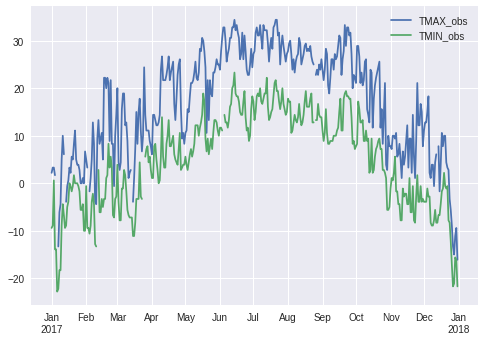

In [72]:
#Need to make some rules about interpolating temperature data. Use a complete portion of data to test.

#disable copy of slice warning
pd.options.mode.chained_assignment = None  # default='warn'

temp_sample = temp.loc['2017-01-01':'2017-12-31']

temp_sample.plot()

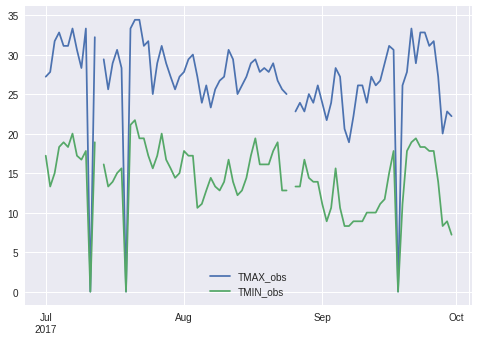

In [79]:
#focus in on smaller complete sample
temp_sample = temp.loc['2017-07-01':'2017-09-30']
temp_sample.plot()

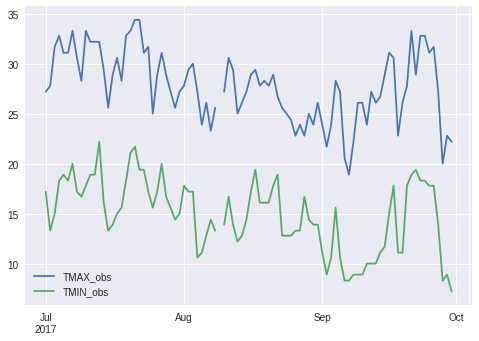

In [134]:
#There are 91 days between Jul 1st and Oct 31st. Pick random day to remove.

temp = pd.read_csv('tmax_tmin.csv', header = 0, index_col= 0)

temp.index = pd.to_datetime(temp.index)

temp_sample = temp.loc['2017-07-01':'2017-09-30']

import random
for x in range(1):
  random_day = random.randint(1,92)

temp_sample.iloc[random_day] = np.nan
temp_sample.iloc[random_day]

temp_sample.plot()



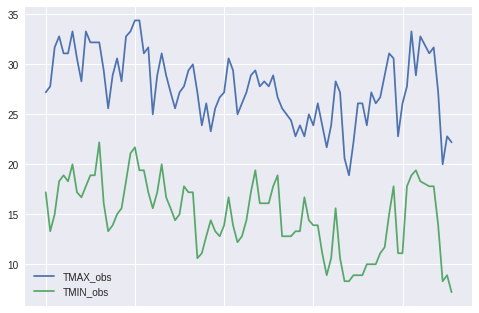

In [117]:
temp_sample.interpolate().plot()

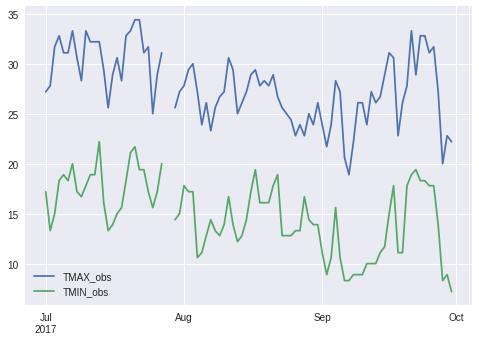

In [150]:
#Remove one point and its nearest neighbors (3 missing points in a row)

temp = pd.read_csv('tmax_tmin.csv', header = 0, index_col= 0)

temp.index = pd.to_datetime(temp.index)

temp_sample = temp.loc['2017-07-01':'2017-09-30']

import random
for x in range(1):
  random_day = random.randint(1,92)

temp_sample.iloc[random_day - 1:random_day + 1] = np.nan


temp_sample.plot()

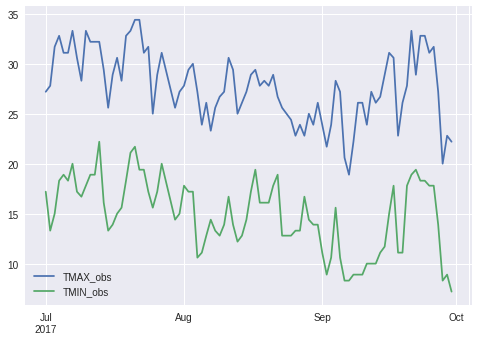

In [152]:
temp_sample.interpolate().plot()

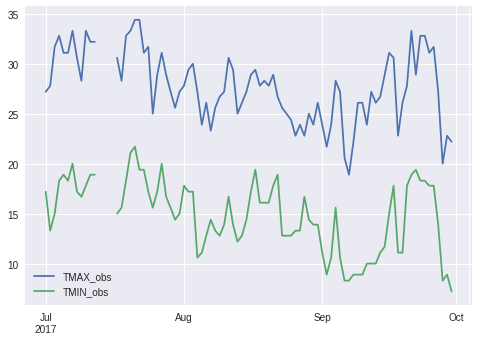

In [200]:
#Remove 4 points in a row

temp = pd.read_csv('tmax_tmin.csv', header = 0, index_col= 0)

temp.index = pd.to_datetime(temp.index)

temp_sample = temp.loc['2017-07-01':'2017-09-30']

import random
for x in range(1):
  random_day = random.randint(1,92)

temp_sample.iloc[random_day:random_day + 4] = np.nan


temp_sample.plot()

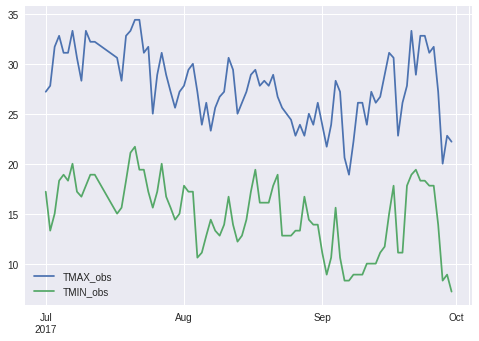

In [201]:
temp_sample.interpolate().plot()
temp_sample_interpolated = temp_sample.interpolate()

In [202]:
temp = pd.read_csv('tmax_tmin.csv', header = 0, index_col= 0)
temp.index = pd.to_datetime(temp.index)


missing = temp_sample.iloc[random_day-5:random_day+5]
interpolated = temp_sample_interpolated.iloc[random_day-5:random_day+5]
original = temp.loc[temp_sample.iloc[random_day-5:random_day+5].index]

aggregate = pd.concat([missing, interpolated, original], axis = 1)

aggregate.columns = ['TMAX_obs','TMIN_obs','TMAX_inter','TMIN_inter','TMAX_original','TMIN_original']

aggregate = aggregate[['TMAX_obs','TMAX_inter','TMAX_original','TMIN_obs','TMIN_inter','TMIN_original']]

aggregate

,TMAX_obs,TMAX_inter,TMAX_original,TMIN_obs,TMIN_inter,TMIN_original
2017-07-08,30.6,30.60,30.6,17.2,17.20,17.2
2017-07-09,28.3,28.30,28.3,16.7,16.70,16.7
2017-07-10,33.3,33.30,33.3,17.8,17.80,17.8
2017-07-11,32.2,32.20,32.2,18.9,18.90,18.9
2017-07-12,32.2,32.20,32.2,18.9,18.90,18.9
2017-07-13,NaN,31.88,32.2,NaN,18.12,22.2
2017-07-14,NaN,31.56,29.4,NaN,17.34,16.1
2017-07-15,NaN,31.24,25.6,NaN,16.56,13.3
2017-07-16,NaN,30.92,28.9,NaN,15.78,13.9
2017-07-17,30.6,30.60,30.6,15.0,15.00,15.0
